<a href="https://colab.research.google.com/github/JabberJaws89/Darpya/blob/main/Theo_Module_2_Project_Exploratory_Data_Analysis_on_Melbourne_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('/content/housingheo.csv')
import matplotlib.pyplot as plt
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
0,Abbotsford,25 Bloomburg St,2,house,1035000,property sold,Biggin,4/2/2016,2.5,3067,2,1,0.0,156,79.0,1900.0,Yarra,Northern Metropolitan,4019
1,Abbotsford,5 Charles St,3,house,1465000,property sold prior,Biggin,4/3/2017,2.5,3067,3,2,0.0,134,150.0,1900.0,Yarra,Northern Metropolitan,4019
2,Abbotsford,55a Park St,4,house,1600000,vendor bid,Nelson,4/6/2016,2.5,3067,3,1,2.0,120,142.0,2014.0,Yarra,Northern Metropolitan,4019
3,Abbotsford,124 Yarra St,3,house,1876000,property sold,Nelson,7/5/2016,2.5,3067,4,2,0.0,245,210.0,1910.0,Yarra,Northern Metropolitan,4019
4,Abbotsford,98 Charles St,2,house,1636000,property sold,Nelson,8/10/2016,2.5,3067,2,1,2.0,256,107.0,1890.0,Yarra,Northern Metropolitan,4019


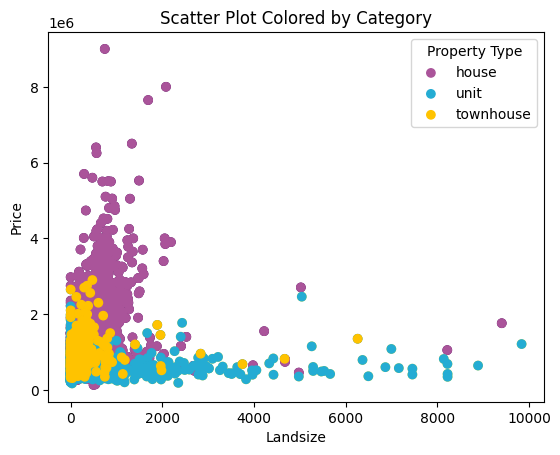

In [ ]:
# Create the scatter plot, coloring by 'category'
colors = ['#AA549A', '#24ACD3', '#FFC300', '#6A0572', '#FF5733']

unique_types = df['Type'].unique()
type_color_map = dict(zip(unique_types, colors))
plt.scatter(df['Landsize'], df['Price'], c=df['Type'].astype('category').cat.codes)

type_codes = df['Type'].astype('category').cat.codes.unique()
for type_name in unique_types:
    df_type = df[df['Type'] == type_name]
    color_code = type_color_map[type_name]
    plt.scatter(df_type['Landsize'], df_type['Price'], c=[color_code] * len(df_type), label=type_name)

plt.xlabel('Landsize')
plt.ylabel('Price')
plt.title('Scatter Plot Colored by Category')
plt.legend(title='Property Type')

plt.show()

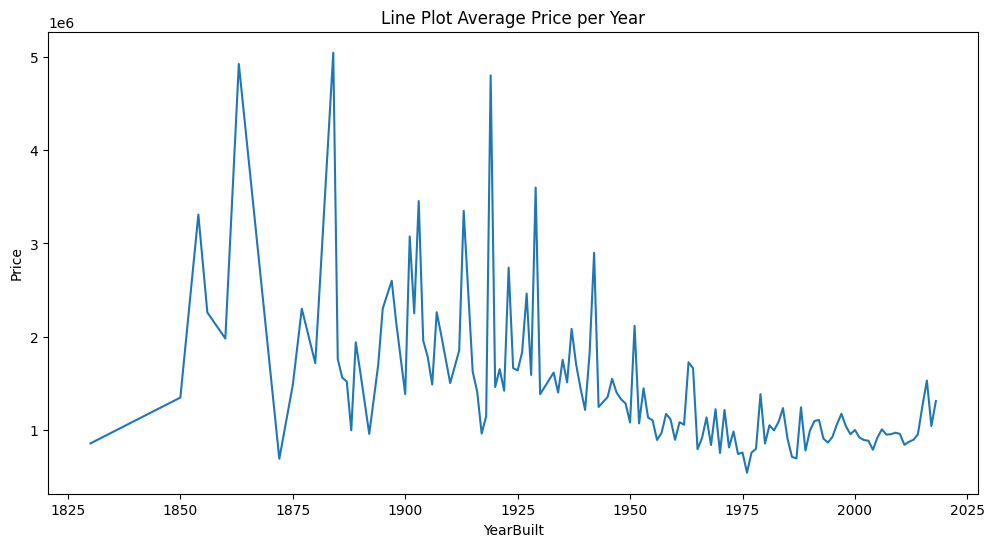

In [ ]:
average_price_per_year = df.groupby('YearBuilt')['Price'].mean().reset_index()
average_price_per_year = average_price_per_year.sort_values('YearBuilt')
plt.figure(figsize=(12, 6))
plt.plot(average_price_per_year['YearBuilt'], average_price_per_year['Price'])

plt.xlabel('YearBuilt')
plt.ylabel('Price')
plt.title('Line Plot Average Price per Year')


plt.show()

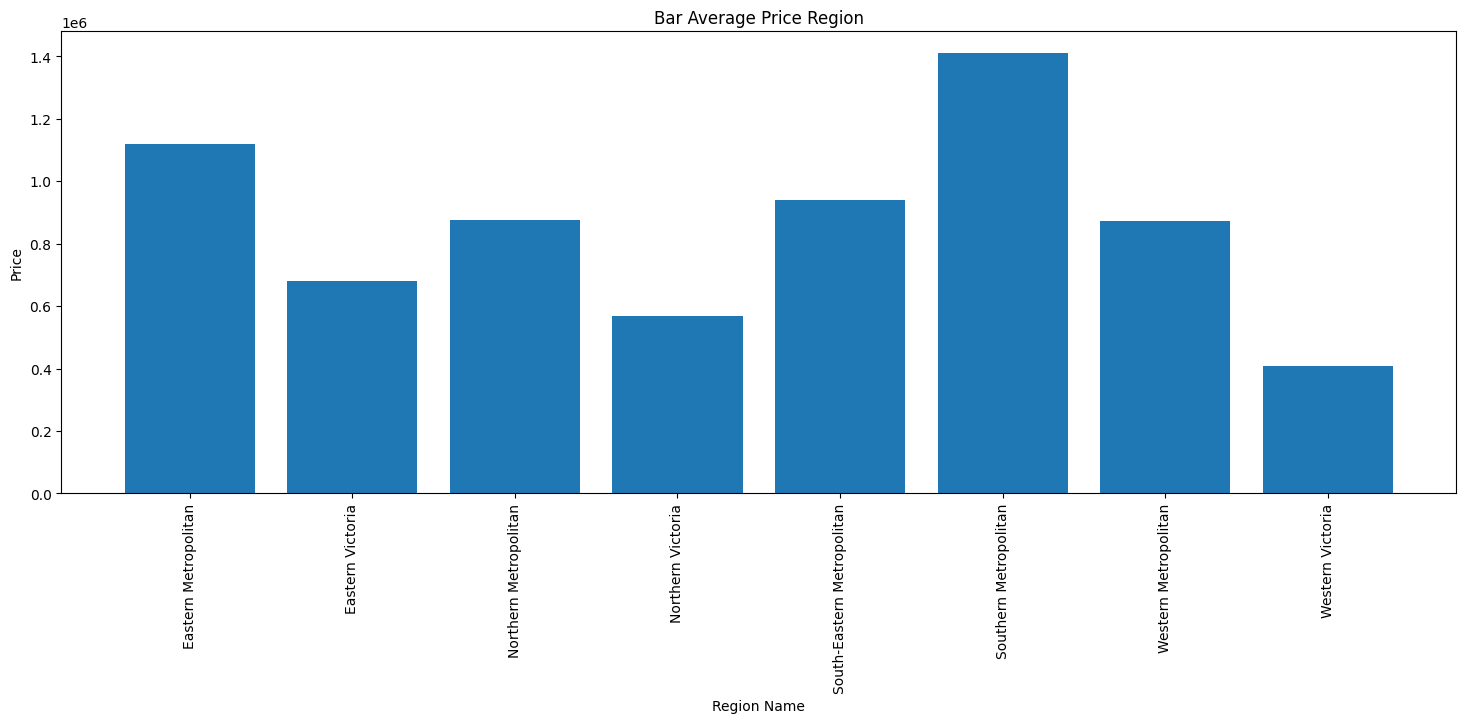

In [ ]:
average_price = df.groupby('Regionname')['Price'].mean().reset_index()
average_price = average_price.sort_values('Regionname')
plt.figure(figsize=(18, 6))
plt.bar(average_price['Regionname'], average_price['Price'])

plt.xlabel('Region Name')
plt.ylabel('Price')
plt.title('Bar Average Price Region')
plt.xticks(rotation=90)

plt.show()

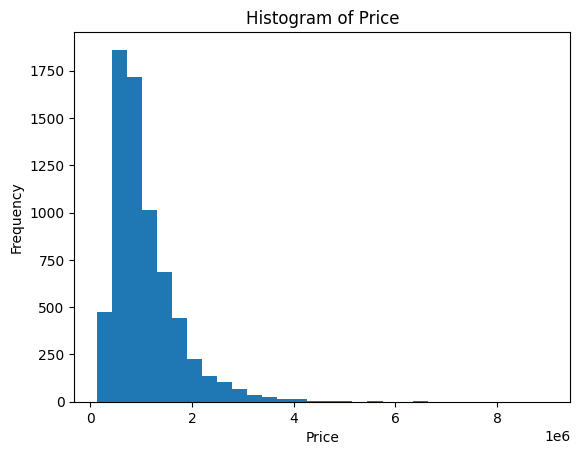

In [ ]:
plt.hist(df['Price'], bins=30)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.show()

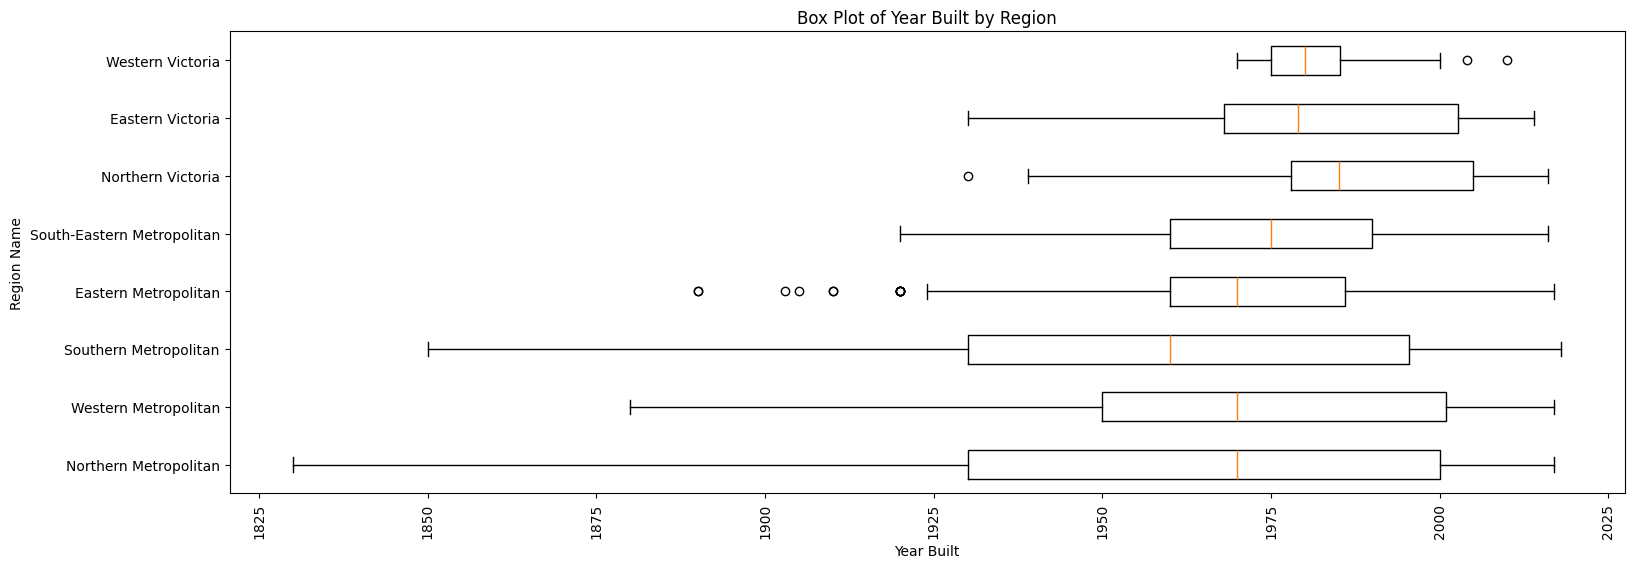

In [ ]:
grouped_data = [df[df['Regionname'] == region]['YearBuilt'].dropna().values for region in df['Regionname'].unique()]
region_names = df['Regionname'].unique()

plt.figure(figsize=(18, 6))
plt.boxplot(grouped_data, tick_labels=region_names, orientation='horizontal')

plt.xlabel('Year Built')
plt.ylabel('Region Name')
plt.title('Box Plot of Year Built by Region')
plt.xticks(rotation=90)

plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6847 entries, 0 to 6846
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         6847 non-null   object 
 1   Address        6847 non-null   object 
 2   Rooms          6847 non-null   int64  
 3   Type           6847 non-null   object 
 4   Price          6847 non-null   int64  
 5   Method         6847 non-null   object 
 6   SellerG        6847 non-null   object 
 7   Date           6847 non-null   object 
 8   Distance       6847 non-null   float64
 9   Postcode       6847 non-null   int64  
 10  Bedroom2       6847 non-null   int64  
 11  Bathroom       6847 non-null   int64  
 12  Car            6819 non-null   float64
 13  Landsize       6847 non-null   int64  
 14  BuildingArea   6847 non-null   float64
 15  YearBuilt      6847 non-null   float64
 16  CouncilArea    6187 non-null   object 
 17  Regionname     6847 non-null   object 
 18  Property